In [118]:
# Importing the necesary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker         


import warnings
warnings.filterwarnings('ignore') 

In [119]:
# Importing data
train = pd.read_csv('C:/Users/Neha/Desktop/portfolio projects05/store_sales prediction analysis/TRAIN.csv')
test = pd.read_csv('C:/Users/Neha/Desktop/portfolio projects05/store_sales prediction analysis/TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,01-01-2018,1,Yes,62,45614.52


In [120]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


# Rename Values

In [121]:
# Rename the values on "Discount" 
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

# Data types

In [122]:
# Data types
print('Data type per variable:')
print(train.dtypes)

Data type per variable:
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object


In [123]:
#debugging
print(train['Date'].head())

0    01-01-2018
1    01-01-2018
2    01-01-2018
3    01-01-2018
4    01-01-2018
Name: Date, dtype: object


In [124]:
# Changing data types
#train[['Store_id', 'Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(object)
train['Date'] = pd.to_datetime(train['Date'],format='%d-%m-%Y')
print(train['Date'].dtype)
print(train['Date'].head())

datetime64[ns]
0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: Date, dtype: datetime64[ns]


# finding errors and duplicates

In [125]:
# Do we have duplicates?
print('Number of duplicates:', len(train[train.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


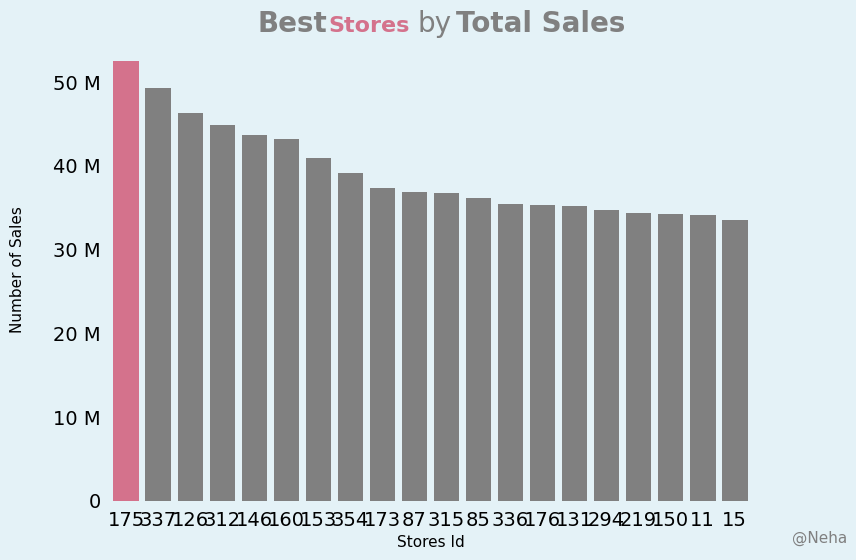

In [126]:
# Set the font family to a available font to prevent errors
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'  # Add this line

# Which are the best stores (by number of sells)?
best_stores = train.groupby(['Store_id'], as_index=False)['Sales'].sum()
best_stores = best_stores.sort_values('Sales', ascending=False)
best_stores = best_stores.head(20)
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_stores.head(1)
col2 = best_stores.tail(19)

ax.bar(col1.Store_id, col1.Sales, color='#d4728c')
ax.bar(col2.Store_id, col2.Sales, color='grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
     ax.spines[i].set_visible(False)

# Setting thousands with k
import matplotlib.ticker as ticker  # Ensure this import exists
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Labels titles
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(4.1, 56000000, "Best", size=20, color="grey", fontweight="bold")
plt.text(6.3, 56000000, "Stores", size=16, color="#d4728c", fontweight="bold")
plt.text(9.1, 56000000, "by", size=20, color="grey")
plt.text(10.3, 56000000, "Total Sales", size=20, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@Neha", fontsize=11, ha="right", color='grey')

plt.show()

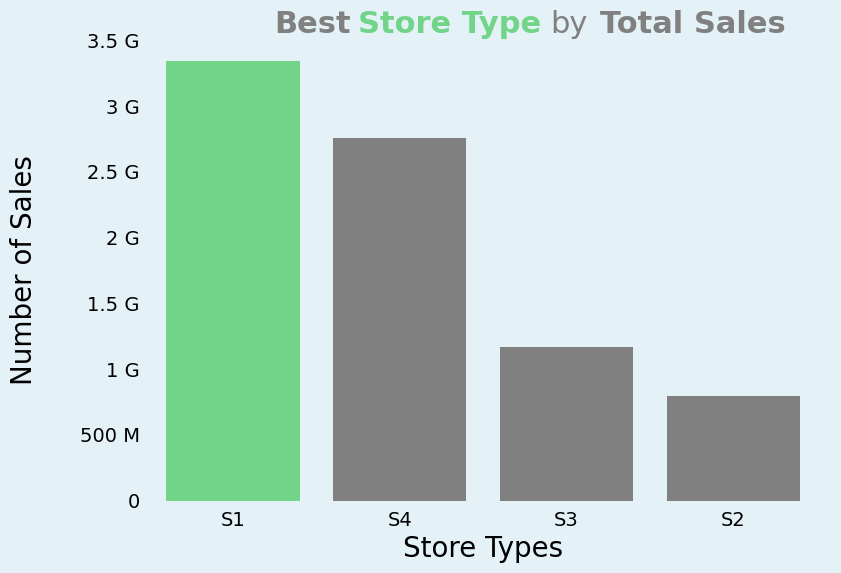

In [127]:
plt.rcParams['font.family'] = 'sans-serif' 

# Which are the best store types (by number of sales)?
best_store_type = train.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)    
best_stores = best_stores.head()
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)


# Visualization
fig, ax = plt.subplots(figsize =(9,6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)


# Setting thousands with k
import matplotlib.ticker as ticker  # Ensure this import exists
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Labels titles
plt.xlabel('Store Types', fontsize=20)
plt.ylabel('Number of Sales', fontsize=20, labelpad=30)

# Title
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.75, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.90, 3555000000, "by", size=22, color="grey")
plt.text(2.2, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")

plt.show()

Text(8.8, 582000000, 'Total Sales')

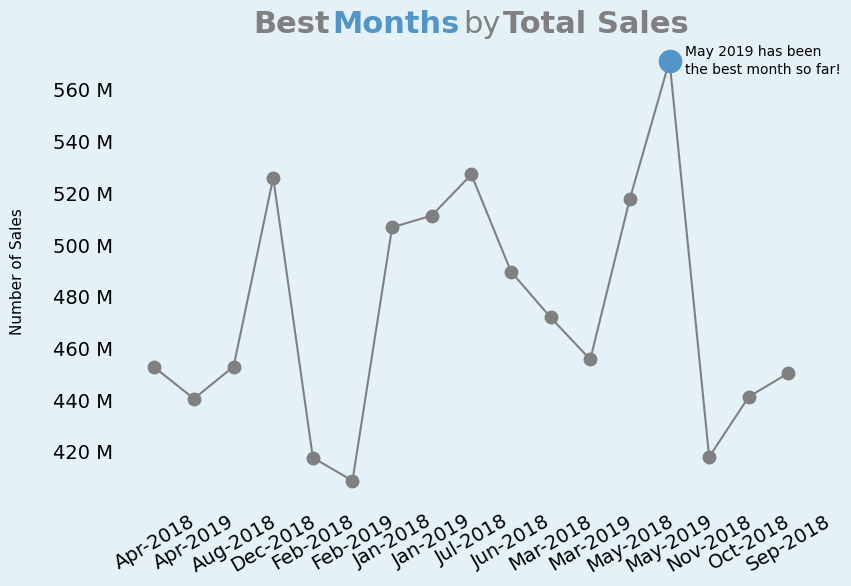

In [128]:
plt.rcParams['font.family'] = 'sans-serif'  
# Best months by sells
best_month = train.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Annotations
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)


# Title
plt.text(2.5, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(4.5, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")


Text(2.9, 3750000000, 'Total Sales')

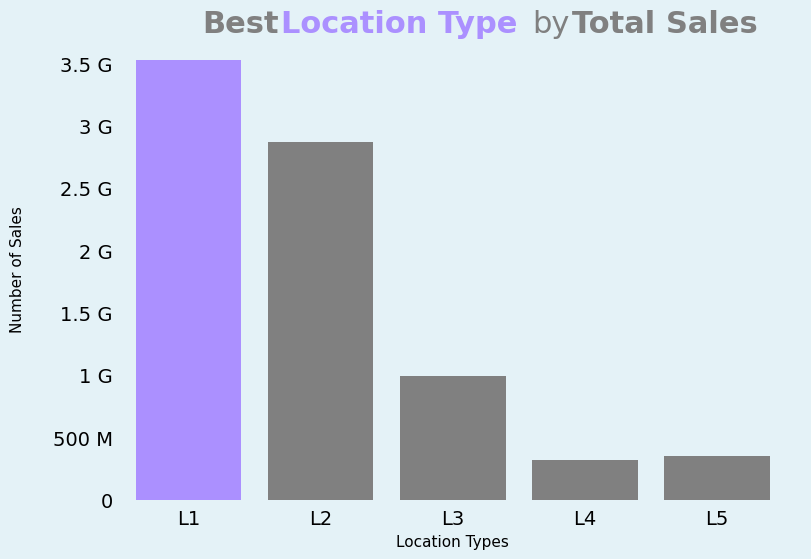

In [129]:
plt.rcParams['font.family'] = 'sans-serif'
# Which are the best locations (by number of sales)?
best_location = train.groupby(['Location_Type'], as_index=False)['Sales'].sum()    
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_location.head(1)
col2 = best_location.tail(4)

ax.bar(col1.Location_Type, col1.Sales, color = '#ab90ff')
ax.bar(col2.Location_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Labels titles
plt.xlabel('Location Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.10, 3750000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.70, 3750000000, "Location Type", size=22, color="#ab90ff", fontweight="bold")
plt.text(2.6, 3750000000, "by", size=22, color="grey")
plt.text(2.9, 3750000000,"Total Sales", size=22, color="grey", fontweight="bold")


Text(1.8, 3200000000, 'Total Sales')

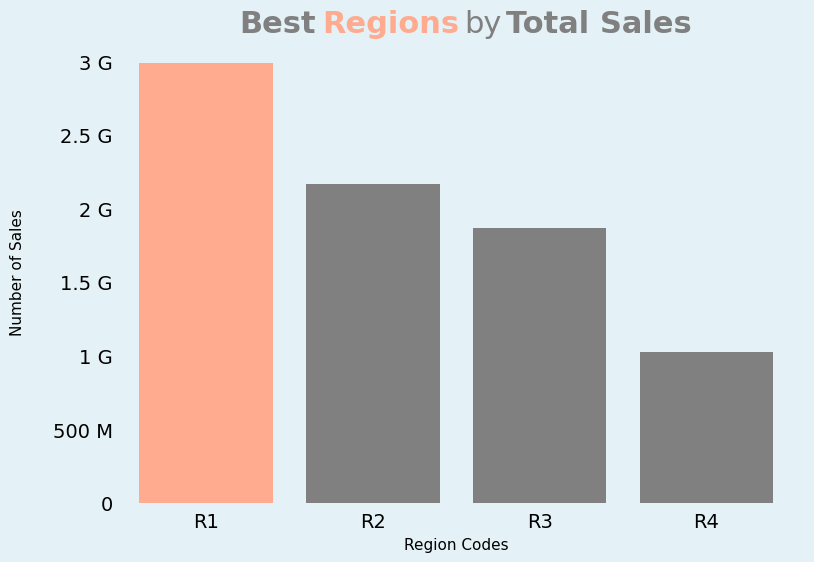

In [130]:
# Which are the best regions (by number of sales)?
best_region = train.groupby(['Region_Code'], as_index=False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)

ax.bar(col1.Region_Code, col1.Sales, color = '#ffab90')
ax.bar(col2.Region_Code, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.2, 3200000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.70, 3200000000, "Regions", size=22, color="#ffab90", fontweight="bold")
plt.text(1.55, 3200000000, "by", size=22, color="grey")
plt.text(1.80, 3200000000,"Total Sales", size=22, color="grey", fontweight="bold")


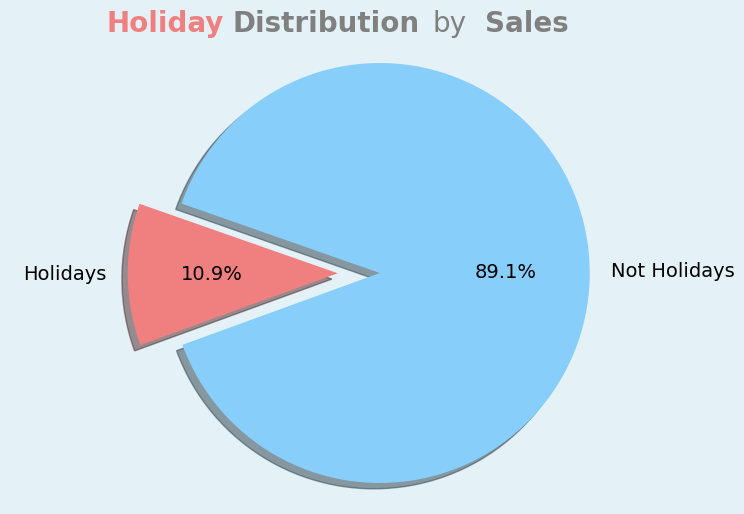

In [131]:
plt.rcParams['font.family'] = 'sans-serif'
# Holidays Distribution
holiday = train.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')

plt.text(-1.10, 1.15, "Holiday", size=20, color="lightcoral", fontweight="bold")
plt.text(-0.50, 1.15, "Distribution", size=20, color="grey", fontweight="bold")
plt.text(0.45, 1.15, "by", size=20, color="grey")
plt.text(0.70, 1.15, "Sales", size=20, color="grey", fontweight="bold")

plt.show()

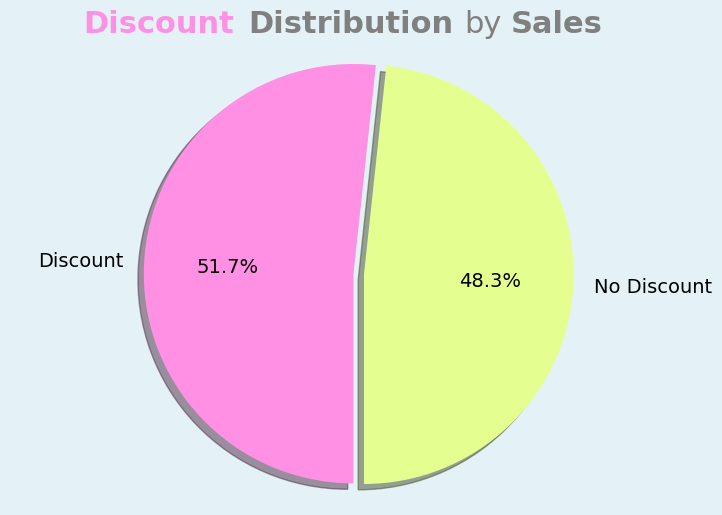

In [132]:
plt.rcParams['font.family'] = 'sans-serif'
# Discount distribution
discount = train.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

mpl.rcParams['font.size'] = 14

plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')

plt.text(-1.29, 1.15, "Discount", size=22, color="#ff90e4", fontweight="bold")
plt.text(-0.50, 1.15, "Distribution", size=22, color="grey", fontweight="bold")
plt.text(0.53, 1.15, "by", size=22, color="grey")
plt.text(0.75, 1.15, "Sales", size=22, color="grey", fontweight="bold")

plt.show()


In [133]:
# Let's check the data again
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


# The "ID" column will be useless for our prediction, so I'll drop it.

In [134]:
# Remove "ID" 
train.drop('ID', axis=1, inplace=True)  

# Changing data types for the model

In [135]:
# Data types
print('Data type per variable:')
print(train.dtypes)

Data type per variable:
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                  int64
#Order                    int64
Sales                   float64
dtype: object


In [136]:
train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)

# Categorical variables

For the categorical variables, I'm going to transform them into dummies variables. This process is known as "One-Hot Encoding."

In [140]:
categ_cols = train.dtypes[train.dtypes == object]      
categ_cols = categ_cols.index.tolist()               
train = pd.get_dummies(train, columns=categ_cols, drop_first=True)

In [139]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day_of_week'] = train['Date'].dt.dayofweek
train['Weekday'] = train['Date'].dt.weekday
train['Quarter'] = train['Date'].dt.quarter

train = train.drop(['Date'], axis = 1) 

train = pd.get_dummies(train, columns=['Year'], drop_first=True, prefix='Year')
train = pd.get_dummies(train, columns=['Month'], drop_first=True, prefix='Month')
train = pd.get_dummies(train, columns=['Day_of_week'], drop_first=True, prefix='Day_of_week')
train = pd.get_dummies(train, columns=['Weekday'], drop_first=True, prefix='Weekday')
train = pd.get_dummies(train, columns=['Quarter'], drop_first=True, prefix='Quarter')

train.head()

,Store_id,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,...,Day_of_week_6,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Quarter_2,Quarter_3,Quarter_4
0,1,1,1,9,7011.84,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,253,1,1,60,51789.12,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,252,1,1,42,36868.20,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,251,1,1,23,19715.16,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,250,1,1,62,45614.52,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Target's correlations

Checking the target's correlation with other variables will be helpful to determine with features are not crucial for the prediction.

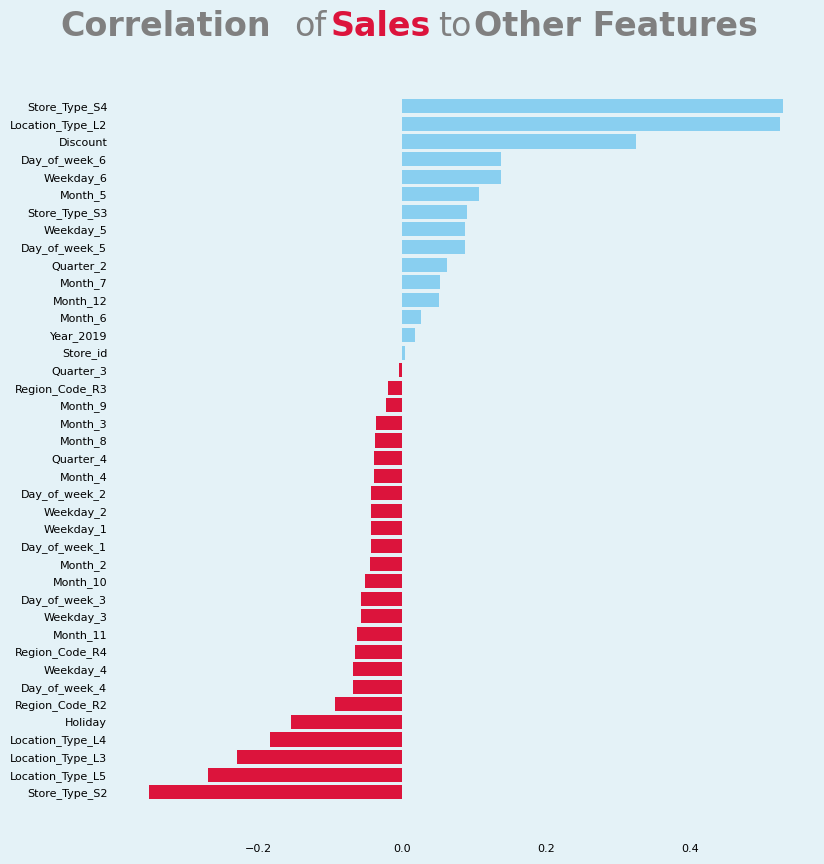

In [159]:
plt.rcParams['font.family'] = 'sans-serif'
corr = train[train.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 10))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

ax.barh(corr.index, corr.Sales, align='center', color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

plt.text(-0.475, 43, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(-0.150, 43, "of", size=24, color="grey");
plt.text(-0.100, 43, "Sales", size=24, color="crimson", fontweight="bold");
plt.text(0.05, 43, "to", size=24, color="grey");
plt.text(0.10, 43, "Other Features", size=24, color="grey", fontweight="bold");


# In my case, I'm going to remove the year and store id.

In [160]:
del train['Store_id']
del train['Year_2019']

# Creating interesting features

In [161]:
train['holiday_and_discount'] = train['Holiday'] * train['Discount']

# Sales

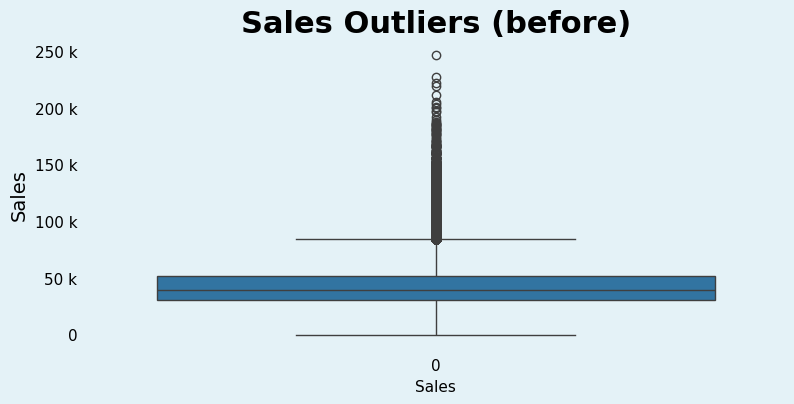

In [167]:
plt.rcParams['font.family'] = 'sans-serif'
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train.Sales);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (before)', size=22, fontweight="bold");

In [169]:
# Dealing with the outliers
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

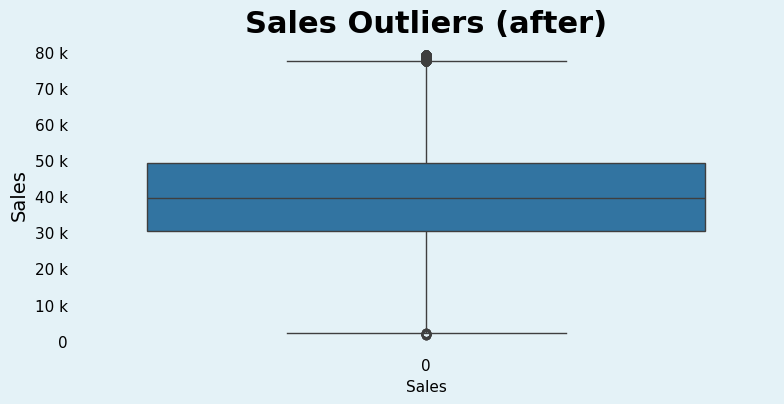

In [170]:
plt.rcParams['font.family'] = 'sans-serif'
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (after)', size=22, fontweight="bold");